<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/langchain/use_cases/Tools_Langchain_OpenAI_Use_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LangChain

LangChain is a framework for developing applications powered by language models.

https://python.langchain.com/docs/use_cases

# Tool use

use case for LLMs is building natural language interfaces for other “tools”, whether those are APIs, functions, databases, etc. LangChain is great for building such interfaces because it has:

- Good model output parsing, which makes it easy to extract JSON, XML, OpenAI function-calls, etc. from model outputs.
- A large collection of built-in Tools.
- Provides a lot of flexibility in how you call these tools.


https://python.langchain.com/docs/get_started/introduction

https://python.langchain.com/docs/use_cases/tool_use/

https://python.langchain.com/docs/modules/model_io/prompts/

https://python.langchain.com/docs/modules/data_connection/document_transformers/recursive_text_splitter

https://api.python.langchain.com/en/latest/experimental_api_reference.html


# Langchain Hub
https://smith.langchain.com/hub

https://docs.smith.langchain.com/hub/quickstart


# Pandas
https://pandas.pydata.org/

# Chains
Chains lets you create a pre-defined sequence of tool usage(s).

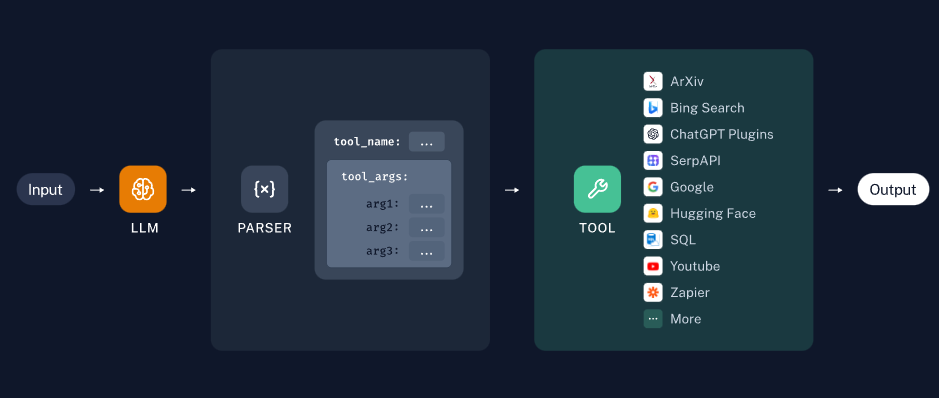

# Agents

Agents let the model use tools in a loop, so that it can decide how many times to use tools.

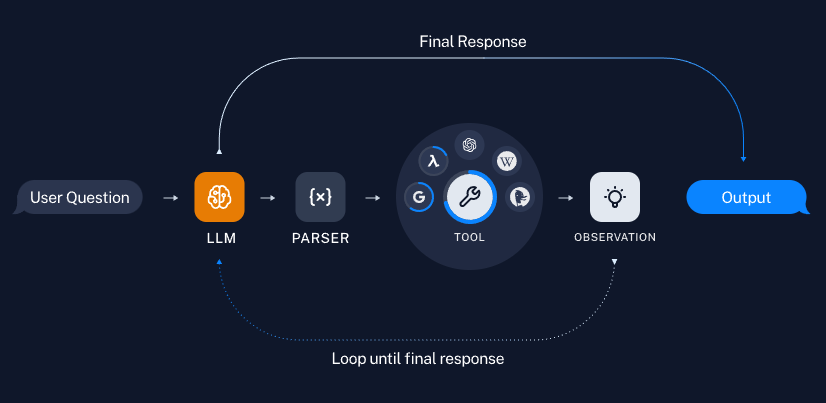

In [1]:
! pip install langchain langchain-community tiktoken -q
! pip install -U accelerate -q
! pip install -U unstructured numpy -q
! pip install openai chromadb beautifulsoup4 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [23]:
! pip install langchain_experimental langchain-openai  faiss-cpu pandas langchainhub -q
! pip install wikipedia -q

  Preparing metadata (setup.py) ... done


In [4]:

from google.colab import output
output.enable_custom_widget_manager()

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import userdata
openai_api_key = userdata.get('KEY_OPENAI')


# Agents

In [6]:
from langchain_core.tools import tool


@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int


@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int


@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent


tools = [multiply, add, exponentiate]

In [10]:
# Create prompt
from langchain import hub
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_openai import ChatOpenAI


# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-tools-agent")
prompt.pretty_print()

================================ System Message ================================

You are a helpful assistant

============================= Messages Placeholder =============================

{chat_history}

================================ Human Message =================================

{input}

============================= Messages Placeholder =============================

{agent_scratchpad}


In [13]:
#OpenAI chat model and an "openai-tools" agent, which will use OpenAI’s function-calling API to drive the agent’s tool selection and invocations.
llm=ChatOpenAI(
        model="gpt-3.5-turbo", temperature=0, openai_api_key=openai_api_key
    )

agent  = create_openai_tools_agent(llm, tools, prompt)

In [14]:
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

agent_executor.invoke(
    {
        "input": "Take 7 to the fifth power and multiply that by the sum of twelve and three, then square the whole result"
    }
)



> Entering new AgentExecutor chain...

Invoking: `exponentiate` with `{'base': 7, 'exponent': 5}`


16807
Invoking: `add` with `{'first_int': 12, 'second_int': 3}`


15
Invoking: `multiply` with `{'first_int': 16807, 'second_int': 15}`


252105
Invoking: `exponentiate` with `{'base': 252105, 'exponent': 2}`


63556931025The result of taking 7 to the fifth power and multiplying that by the sum of twelve and three, then squaring the whole result is 63,556,931,025.

> Finished chain.


{'input': 'Take 7 to the fifth power and multiply that by the sum of twelve and three, then square the whole result',
 'output': 'The result of taking 7 to the fifth power and multiplying that by the sum of twelve and three, then squaring the whole result is 63,556,931,025.'}

# Chains

# Choosing between multiple tools
Chains are great when we know the specific sequence of tool usage needed for any user input.

Agents can route between multiple tools by default, chains No

With an agent, we can ask questions that require arbitrarily-many uses of our tools


Instead we’ll add call_tool_list, a RunnableLambda that takes the JsonOutputToolsParser output and actually builds the end of the chain based on it, meaning it appends the Tools that were envoked to the end of the chain at runtime. We can do this because LCEL has the cool property that in any Runnable (the core building block of LCEL) sequence, if one component returns more Runnables, those are run as part of the chain

# JsonOutputToolsParser
Class for parsing the output of a tool-calling LLM into a JSON object.

# RunnablePassthrough
https://python.langchain.com/docs/expression_language/how_to/passthrough

RunnablePassthrough allows to pass inputs unchanged or with the addition of extra keys. This typically is used in conjuction with RunnableParallel to assign data to a new key in the map

In [17]:
from operator import itemgetter
from typing import Union

from langchain.output_parsers import JsonOutputToolsParser
from langchain_core.runnables import (
    Runnable,
    RunnableLambda,
    RunnableMap,
    RunnablePassthrough,
)

def call_tool(tool_invocation: dict) -> Union[str, Runnable]:
    """Function for dynamically constructing the end of the chain based on the model-selected tool."""
    tool = tool_map[tool_invocation["type"]]
    return RunnablePassthrough.assign(output=itemgetter("args") | tool)

tools = [multiply, exponentiate, add]
model_with_tools = llm.bind_tools(tools)
tool_map = {tool.name: tool for tool in tools}
tool_map

{'multiply': StructuredTool(name='multiply', description='multiply(first_int: int, second_int: int) -> int - Multiply two integers together.', args_schema=<class 'pydantic.v1.main.multiplySchema'>, func=<function multiply at 0x7de5fd919120>),
 'exponentiate': StructuredTool(name='exponentiate', description='exponentiate(base: int, exponent: int) -> int - Exponentiate the base to the exponent power.', args_schema=<class 'pydantic.v1.main.exponentiateSchema'>, func=<function exponentiate at 0x7de5e4d4dfc0>),
 'add': StructuredTool(name='add', description='add(first_int: int, second_int: int) -> int - Add two integers.', args_schema=<class 'pydantic.v1.main.addSchema'>, func=<function add at 0x7de5e4d4de10>)}

In [18]:

# .map() allows us to apply a function to a list of inputs.
call_tool_list = RunnableLambda(call_tool).map()
chain = model_with_tools | JsonOutputToolsParser() | call_tool_list


In [53]:
chain.invoke("What's 23 times 7")

[{'type': 'multiply',
  'args': {'first_int': 23, 'second_int': 7},
  'output': 161}]

In [20]:
chain.invoke("add a million plus a billion")

[{'type': 'add',
  'args': {'first_int': 1000000, 'second_int': 1000000000},
  'output': 1001000000}]

In [21]:
[{'type': 'exponentiate',
  'args': {'base': 37, 'exponent': 3},
  'output': 50653}]

[{'type': 'exponentiate',
  'args': {'base': 37, 'exponent': 3},
  'output': 50653}]

In [54]:
chain.invoke("Take 7 to the fifth power and multiply that by the sum of twelve and three, then square the whole result")

[{'type': 'exponentiate', 'args': {'base': 7, 'exponent': 5}, 'output': 16807},
 {'type': 'add', 'args': {'first_int': 12, 'second_int': 3}, 'output': 15}]

In [56]:
chain.invoke("Take 7 to the fifth power assing to z, sum  twelve and three and assing to y, multiply z  by y  and assing result to x, then square x ")

[{'type': 'exponentiate', 'args': {'base': 7, 'exponent': 5}, 'output': 16807}]

# Tools
https://api.python.langchain.com/en/latest/langchain_api_reference.html#module-langchain.tools

https://api.python.langchain.com/en/latest/community_api_reference.html#module-langchain_community.tools

https://python.langchain.com/docs/modules/agents/tools/

https://python.langchain.com/docs/modules/agents/tools/custom_tools

https://python.langchain.com/docs/modules/agents/tools/tools_as_openai_functions

In [57]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=2000)
tool = WikipediaQueryRun(api_wrapper=api_wrapper)


In [58]:
tool.run({"query": "neo4j"})

'Page: Neo4j\nSummary: Neo4j is a graph database management system developed by Neo4j, Inc.\nThe data elements Neo4j stores are nodes, edges connecting them, and attributes of nodes and edges. Described by its developers as an ACID-compliant transactional database with native graph storage and processing, Neo4j is available in a non-open-source "community edition" licensed with a modification of the GNU General Public License, with online backup and high availability extensions licensed under a closed-source commercial license. Neo also licenses Neo4j with these extensions under closed-source commercial terms.Neo4j is implemented in Java and accessible from software written in other languages using the Cypher query language through a transactional HTTP endpoint, or through the binary "Bolt" protocol. The "4j" in Neo4j is a reference to its being built in Java, however is now largely viewed as an anachronism.\n\n'

In [59]:
tool.run({"query": "who is the UK PM?"})

"Page: Prime Minister of the United Kingdom\nSummary: The prime minister of the United Kingdom is the head of government of the United Kingdom. The prime minister advises the sovereign on the exercise of much of the royal prerogative, chairs the Cabinet and selects its ministers. As modern prime ministers hold office by virtue of their ability to command the confidence of the House of Commons, they sit as members of Parliament. The current prime minister is Rishi Sunak of the Conservative Party, who assumed the office on 25 October 2022.The office of prime minister is not established by any statute or constitutional document, but exists only by long-established convention, whereby the monarch appoints as prime minister the person most likely to command the confidence of the House of Commons. In practice, this is the leader of the political party that holds the largest number of seats in the Commons.\nThe prime minister is ex officio also First Lord of the Treasury (prior to 1905 also t

In [33]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/titanic.csv")
print(df.shape)
print(df.columns.tolist())

(887, 8)
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


In [60]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [61]:
df['Fare'].mean()

32.30542018038331

In [34]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_experimental.tools import PythonAstREPLTool


tool = PythonAstREPLTool(locals={"df": df})
tool.invoke("df['Fare'].mean()")

32.30542018038331

In [35]:
tool.invoke("df.columns")

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

# Google search Engine

https://programmablesearchengine.google.com/controlpanel/all
https://console.cloud.google.com/apis/
https://stackoverflow.com/questions/37083058/programmatically-searching-google-in-python-using-custom-search
https://cloud.google.com/apis/docs/client-libraries-explained#google_api_client_libraries


In [48]:
import os

os.environ["GOOGLE_CSE_ID"] = userdata.get('GOOGLE_CSE_ID')
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [50]:
from langchain_community.utilities import GoogleSearchAPIWrapper
from langchain_core.tools import Tool

search = GoogleSearchAPIWrapper()

tool = Tool(
    name="google_search",
    description="Search Google for recent results.",
    func=search.run,
)

In [51]:
tool.run("who it is prime minister of UK?")

'^ "Rishi Sunak: A quick guide to the UK\'s new prime minister". BBC News. 24 October 2022. Archived from the original on 25 April 2023. Retrieved 26 April 2023. The Rt Hon Rishi Sunak MP. Rishi Sunak became Prime Minister on 25 October 2022. He was previously appointed Chancellor of the Exchequer from 13 February 2020\xa0... As modern prime ministers hold office by virtue of their ability to command the confidence of the House of Commons, they sit as members of Parliament. The\xa0... 20th century · The Rt Hon Sir Tony Blair KG · The Rt Hon Sir John Major KG CH · Baroness Thatcher · James Callaghan · Harold Wilson · Sir Edward Heath · Sir\xa0... Bottom right: Rishi Sunak is the incumbent prime minister and the first non-white prime minister. Modern historians generally consider Robert Walpole, who led\xa0... Official page for Prime Minister @RishiSunak\'s office, based at 10 Downing Street. Oct 25, 2022 ... Rishi Sunak: A quick guide to the UK\'s new prime minister · He won after runni


# Human in the Loop
# https://python.langchain.com/docs/use_cases/tool_use/human_in_the_loop

# to read
https://python.langchain.com/docs/use_cases/tool_use/parallel


https://python.langchain.com/docs/use_cases/tool_use/tool_error_handling